# Lotto Extraction Analysis
This notebook contains code to fetch lotto extraction data, perform frequency analysis, and visualize the results with a color gradient.

## Importing Required Libraries

In [101]:
import requests
import re
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import Normalize

## Function to Fetch Lotto Data

In [102]:
def read_lotto_file(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        lines = response.text.split('\n')
        lotto_data = {}
        for line in lines:
            match = re.match(r'(\d+)\.\s+(\d{2}\.\d{2}\.\d{4})\s+([\d,]+)', line)
            if match:
                play_number = int(match.group(1))
                date = match.group(2)
                numbers = [int(num) for num in match.group(3).split(',')]
                lotto_data[play_number] = {
                    'gametype': 'MiniLotto',
                    'date': date,
                    'numbers': numbers
                }
        return lotto_data
    except requests.RequestException as e:
        print(f'Error fetching data: {e}')
url = 'http://www.mbnet.com.pl/el.txt'
lotto_results = read_lotto_file(url)

## Last 10 Extractions

In [103]:
# Displaying the last 10 (newest) results from lotto_results dictionary
last_10_plays = sorted(lotto_results.keys())[-10:]
for play_number in last_10_plays:
    result = lotto_results[play_number]
    print(f"Play Number: {play_number}, Date: {result['date']}, Numbers: {result['numbers']}")


Play Number: 6299, Date: 04.12.2023, Numbers: [17, 20, 24, 31, 33]
Play Number: 6300, Date: 05.12.2023, Numbers: [12, 20, 27, 32, 39]
Play Number: 6301, Date: 06.12.2023, Numbers: [6, 10, 16, 26, 34]
Play Number: 6302, Date: 07.12.2023, Numbers: [1, 4, 9, 29, 33]
Play Number: 6303, Date: 08.12.2023, Numbers: [11, 21, 34, 37, 38]
Play Number: 6304, Date: 09.12.2023, Numbers: [6, 33, 37, 40, 41]
Play Number: 6305, Date: 10.12.2023, Numbers: [4, 13, 16, 19, 31]
Play Number: 6306, Date: 11.12.2023, Numbers: [2, 23, 24, 36, 42]
Play Number: 6307, Date: 12.12.2023, Numbers: [4, 11, 22, 27, 29]
Play Number: 6308, Date: 13.12.2023, Numbers: [3, 5, 10, 25, 29]


## Frequency Analysis

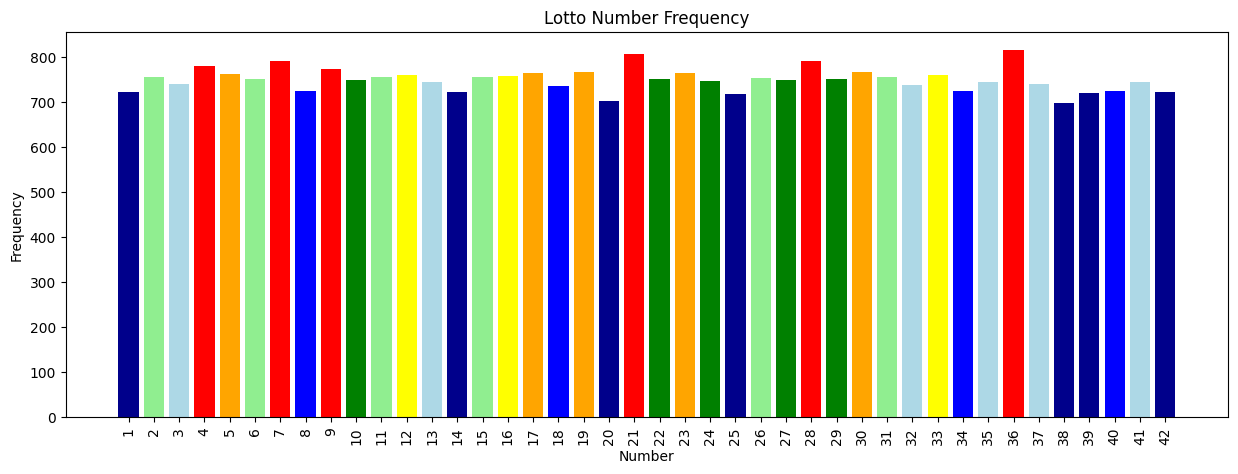

In [104]:
def frequency_analysis(lotto_data):
    numbers = []
    for play in lotto_data.values():
        numbers.extend(play['numbers'])
    return Counter(numbers)

number_frequency = frequency_analysis(lotto_results)
sorted_numbers = sorted(number_frequency.items(), key=lambda x: x[1])
numbers, frequencies = zip(*sorted_numbers)

# Define nine thresholds for the deciles
thresholds = np.quantile(frequencies, np.linspace(1/8, 7/8, 7))

# Define 10 colors for each decile
octile_colors = [
    'darkblue',    # Least frequent - coldest
    'blue',
    'lightblue',
    'green',
    'lightgreen',
    'yellow',
    'orange',
    'red'        # Most frequent - hottest
]

# Assign a color based on which decile each frequency falls into
colors = []
for freq in frequencies:
    for i, threshold in enumerate(thresholds):
        if freq <= threshold:
            colors.append(octile_colors[i])
            break
    else:
        colors.append(octile_colors[-1])  # Assign the last color to the top decile

# Plotting the results with the assigned colors
plt.figure(figsize=(15, 5))
plt.bar(numbers, frequencies, color=colors)
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Lotto Number Frequency')
plt.xticks(numbers, rotation=90)
plt.show()

## Print the five more and less probable numbers

In [105]:
# Sorting the numbers by frequency in descending order
most_frequent_numbers = sorted(number_frequency, key=number_frequency.get, reverse=True)[:5]

# Sorting the numbers by frequency in ascending order
least_frequent_numbers = sorted(number_frequency, key=number_frequency.get)[:5]

print("5 Most Probable Numbers:", most_frequent_numbers)
print("5 Least Probable Numbers:", least_frequent_numbers)

5 Most Probable Numbers: [36, 21, 28, 7, 4]
5 Least Probable Numbers: [38, 20, 25, 39, 14]


## Verifying if the Most or Least Probable Sets of Five Numbers Have Been Previously Drawn

In [106]:
def check_occurrence(lotto_data, numbers_set):
    occurrences = []
    for play_number, play_data in lotto_data.items():
        if set(play_data['numbers']) == numbers_set:
            occurrences.append((play_number, play_data['date']))
    return occurrences

# Most and least probable numbers
most_probable_numbers = set(most_frequent_numbers)
least_probable_numbers = set(least_frequent_numbers)

# Check if these sets ever occurred in the history
most_probable_occurrences = check_occurrence(lotto_results, most_probable_numbers)
least_probable_occurrences = check_occurrence(lotto_results, least_probable_numbers)

print("Occurrences of Most Probable Numbers:")
if most_probable_occurrences:
    for play_number, date in most_probable_occurrences:
        print(f"Play Number: {play_number}, Date: {date}")
else:
    print("None")

print("\nOccurrences of Least Probable Numbers:")
if least_probable_occurrences:
    for play_number, date in least_probable_occurrences:
        print(f"Play Number: {play_number}, Date: {date}")
else:
    print("None")


Occurrences of Most Probable Numbers:
None

Occurrences of Least Probable Numbers:
None
